In [11]:
import pandas as pd
import numpy as np
import os
import random

import PIL.Image as Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data

### About TMED-2

Our experiment uses Tufts Medical Echocardiogram Dataset-2 (TMED-2) dataset.
  * TMED-2 is a clinically-motivated benchmark dataset for computer vision and machine learning from limited data.
  * This dataset is designed to be an authentic assessment of semi-supervised learning methods that train classifiers from a small, hard-to-acquire labeled dataset and a much larger unlabeled set.
  
The TMED-2 dataset obtained from 2011-2020 at Tufts Medical Center.
  * The TMED-2 dataset contains transthoracic echocardiogram (TTE) imagery, acquired in the course of routine care consistent with American Society of Echocardiography (ASE) guidelines.
  * More information about retrieving the TMED-2 dataset can found [here](https://tmed.cs.tufts.edu/index.html).

### Overview

TMED-2 dataset contains three components:
1. `view_and_diagnosis_labeled_set`: 599 bags from 577 unique patients, where all patients have an AS diagnostic label - (1)none, (2)early AS, or (3)significant AS. Also has view label annotations.
      * This dataset has been partitioned by patient into 360 training / 119 validation / 120 test bags.
2. `view_labeled_set`: 705 bags from 703 unique patients. These bags have view labels, but no AS diagnosis labels.
3. `unlabeled_set`: 5,486 bags from 5,287 patients, and no labels are available for any bags in this set.

### Statistics


Below is the summary table of TMED-2 dataset:

| Dataset            | Num. Patients | Num. Studies | Num. Labeled Images | Num. Unlabeled Images |
|--------------------|---------------|--------------|---------------------|-----------------------|
| fully labeled set  | 577           | 599          | 17,270               | 26,596                 |
| partially labeled set | 703         | 705          | 7,694                | 37,576                 |
| unlabeled set      | 5,287          | 5,486         | 0                   | 353,500                |


### Image Preprocessing

Data processing has been already implemented on the dataset.
* Every image in this dataset is a 2D transthoracic echocardiogram (TTE) image stored at 112x112 pixel resolution in PNG format.

### Illustrations

In [2]:
def LoadImage(file_path):
    im = Image.open(file_path)
    im = np.asarray(im)/255
    return im

def ShowGrayscaleImage(file_path, title='', ax=None):
    im = LoadImage(file_path)
    if ax is None:
        plt.figure()

    plt.axis('off')
    plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=1)
    plt.title(title)

def find_label(query_key):
    assert len(labels_per_image_csv.index[labels_per_image_csv['query_key']==query_key].tolist())==1

    row_id = labels_per_image_csv.index[labels_per_image_csv['query_key']==query_key].tolist()[0]
    view_label = labels_per_image_csv.iloc[row_id].view_label
    diagnosis_label = labels_per_image_csv.iloc[row_id].diagnosis_label

    return view_label, diagnosis_label

In [31]:
# CHANGE THIS WITH YOUR TMED2 DIRECTORY PATH!
TMED2_PATH = "TMED2/approved_users_only"

In [5]:
labels_per_image_csv = pd.read_csv(os.path.join(TMED2_PATH, 'labels_per_image.csv'))
labels_per_image_csv

,query_key,view_label,diagnosis_label
0,4860s1_0.png,A4C,moderate_AS
1,4860s1_1.png,A2C,moderate_AS
2,4860s1_2.png,PLAX,moderate_AS
3,4860s1_3.png,PLAX,moderate_AS
4,4860s1_4.png,PLAX,moderate_AS
...,...,...,...
24959,2797s1_28.png,A4C,Not_Provided
24960,235s1_0.png,PLAX,Not_Provided
24961,235s1_1.png,A4C,Not_Provided
24962,235s1_2.png,PLAX,Not_Provided


Text(0.5, 1.0, 'Diagnosis Label Distribution')

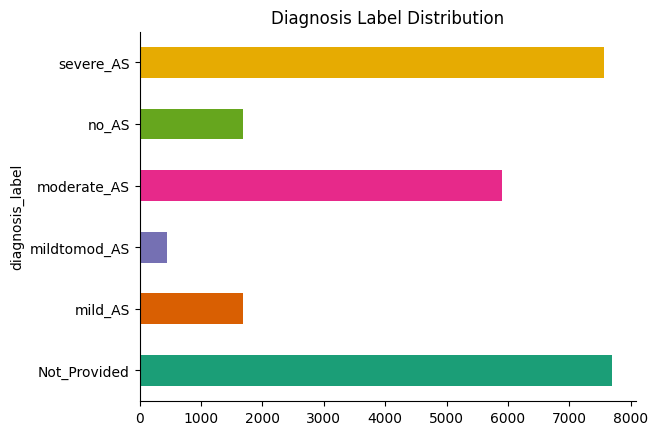

In [12]:
labels_per_image_csv.groupby('diagnosis_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Diagnosis Label Distribution')

Text(0.5, 1.0, 'View Label Distribution')

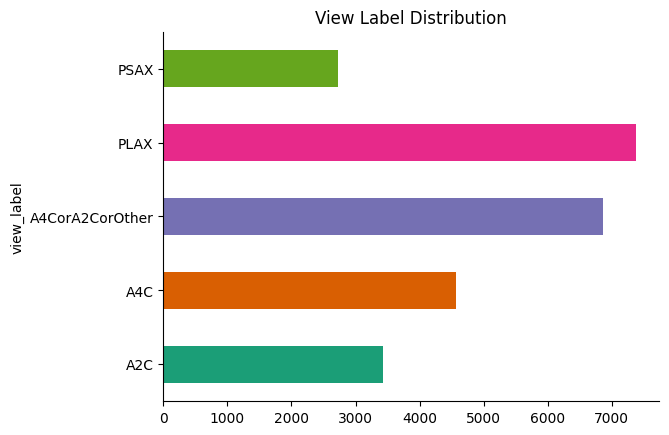

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
labels_per_image_csv.groupby('view_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('View Label Distribution')

**visualization from `view_and_diagnosis_labeled_set`**

In [22]:
view_and_diagnosis_label_set_path = os.path.join(TMED2_PATH, 'view_and_diagnosis_labeled_set/labeled')
ImageList_view_and_diagnosis_labeled_set = os.listdir(view_and_diagnosis_label_set_path)
print('number of images in the ImageList_view_and_diagnosis_labeledset: {}'.format(len(ImageList_view_and_diagnosis_labeled_set)))

number of images in the ImageList_view_and_diagnosis_labeledset: 17270


In [23]:
im_to_visualize = random.choice(ImageList_view_and_diagnosis_labeled_set)
view_label, diagnosis_label = find_label(im_to_visualize)

Currently visualizing 4496s1_8.png from labeled set
view: A4C, diagnosis: moderate_AS


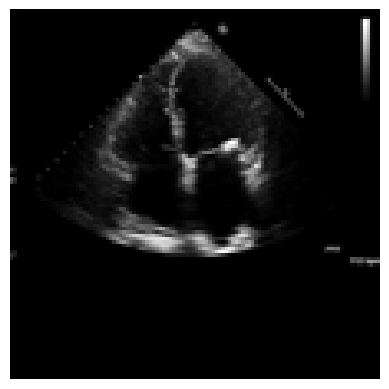

In [24]:
print('Currently visualizing {} from labeled set'.format(im_to_visualize))
print('view: {}, diagnosis: {}'.format(view_label, diagnosis_label))
ShowGrayscaleImage(os.path.join(view_and_diagnosis_label_set_path, im_to_visualize))

**visualization `from view_labeled_set`**

In [28]:
view_labeled_set_path = os.path.join(TMED2_PATH, 'view_labeled_set/labeled')
ImageList_view_labeled_set = os.listdir(view_labeled_set_path)
print('number of images in the ImageList_view_labeledset: {}'.format(len(ImageList_view_labeled_set)))

number of images in the ImageList_view_labeledset: 7694


In [29]:
im_to_visualize = random.choice(ImageList_view_labeled_set)
view_label, diagnosis_label = find_label(im_to_visualize)

Currently visualizing 145s1_8.png from labeled set
view: A2C, diagnosis: Not_Provided


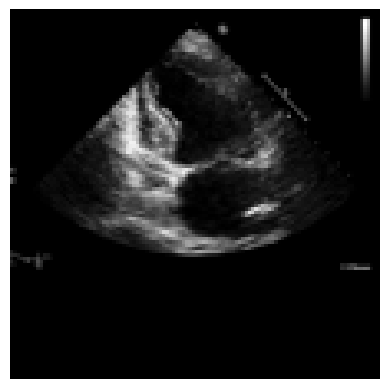

In [30]:
print('Currently visualizing {} from labeled set'.format(im_to_visualize))
print('view: {}, diagnosis: {}'.format(view_label, diagnosis_label))
ShowGrayscaleImage(os.path.join(view_labeled_set_path, im_to_visualize))